# Monte Carlo Simulation 2

In [1]:
import random, pylab

In [2]:

class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.blackOdds, self.redOdds = 1.0, 1.0
        self.pocketOdds = len(self.pockets) - 1.0
    def spin(self):
        self.ball = random.choice(self.pockets)
    def isBlack(self):
        if type(self.ball) != int:
            return False
        if ((self.ball > 0 and self.ball <= 10)\
            or (self.ball>18 and self.ball<=28)):
            return self.ball%2 == 0
        else:
            return self.ball%2 == 1
    def isRed(self):
        return type(self.ball) == int and not self.isBlack()
    def betBlack(self, amt):
        if self.isBlack():
            return amt*self.blackOdds
        else: return -amt
    def betRed(self, amt):
        if self.isRed():
            return amt*self.redOdds
        else: return -amt*self.redOdds
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

# Europäisches Roulette
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

# Amerikanisches Roulette 
class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'

In [3]:
def playRoulette(game, numSpins, toPrint = True):
    luckyNumber = '2'
    bet = 1
    totRed, totBlack, totPocket = 0.0, 0.0, 0.0
    for i in range(numSpins):
        game.spin()
        totRed += game.betRed(bet)
        totBlack += game.betBlack(bet)
        totPocket += game.betPocket(luckyNumber, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting red =',
              str(100*totRed/numSpins) + '%')
        print('Expected return betting black =', 
              str(100*totBlack/numSpins) + '%')
        print('Expected return betting', luckyNumber, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totRed/numSpins, totBlack/numSpins, totPocket/numSpins)

#numSpins = 10000000
#game = FairRoulette()
#playRoulette(game, numSpins)



def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, toPrint)
        pocketReturns.append(trialVals[2])
    return pocketReturns


In [5]:
random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)

for G in games:
    resultDict[G().__str__()] = []
for numSpins in (100, 1000, 10000, 100000):
    print('\nSimuliere', numTrials,
          'Versuche, mit',
          numSpins, 'Drehungen am Roulette')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        print('Erwarteter Gewinn', G(), '=',
             str(100*sum(pocketReturns)/float(len(pocketReturns))) + '%')



Simulate betting a pocket for 20 trials of 100 spins each
Exp. return for Fair Roulette = 6.199999999999998%
Exp. return for European Roulette = -8.200000000000001%
Exp. return for American Roulette = 2.599999999999998%

Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Roulette = 4.760000000000002%
Exp. return for European Roulette = -2.4399999999999995%
Exp. return for American Roulette = -9.46%

Simulate betting a pocket for 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.3060000000000003%
Exp. return for European Roulette = -4.095999999999999%
Exp. return for American Roulette = -5.698000000000001%

Simulate betting a pocket for 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.7982%
Exp. return for European Roulette = -2.5876000000000006%
Exp. return for American Roulette = -5.134600000000001%


In [6]:

def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std



Simulate betting a pocket for 20 trials of 100 spins each
Exp. return for Fair Roulette = 6.2%, +/- 152.114% with 95% confidence
Exp. return for European Roulette = -8.2%, +/- 90.567% with 95% confidence
Exp. return for American Roulette = 2.6%, +/- 92.74% with 95% confidence

Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Roulette = 4.76%, +/- 39.658% with 95% confidence
Exp. return for European Roulette = -2.44%, +/- 31.31% with 95% confidence
Exp. return for American Roulette = -9.46%, +/- 36.273% with 95% confidence

Simulate betting a pocket for 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.306%, +/- 9.295% with 95% confidence
Exp. return for European Roulette = -4.096%, +/- 10.902% with 95% confidence
Exp. return for American Roulette = -5.698%, +/- 11.077% with 95% confidence


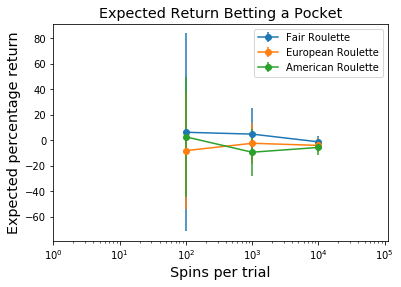

In [7]:

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (100, 1000, 10000):
    print('\nSimuliere', numTrials,
          'Versuche, mit je', numSpins, 'Drehungen am Roulette')
    for G in games:
        pocketReturns = findPocketReturn(G(), 20, numSpins, False)
        mean, std = getMeanAndStd(pocketReturns)
        resultDict[G().__str__()].append((numSpins,
                                          100*mean, 100*std))
        print('Erwarteter Gewinn/Verlust', G(), '=', str(round(100*mean, 3))
              + '%,', '+/- ' + str(round(100*1.96*std, 3))
              + '% mit 95% Konfidenz')
              

def plotReturn(resultDict):
    for k in resultDict:
        xVals, yVals, eVals = [], [], []
        for trial in resultDict[k]:
            xVals.append(trial[0])
            yVals.append(trial[1])
            eVals.append(trial[2])
        pylab.errorbar(xVals, yVals, yerr = eVals, label = k, marker = 'o')
    pylab.legend()
    pylab.xlabel('Spins per trial', fontsize = 'x-large')
    pylab.ylabel('Expected percentage return', fontsize = 'x-large')
    pylab.title('Expected Return Betting a Pocket', fontsize = 'x-large')
    pylab.semilogx()
    minX, maxX = pylab.xlim()
    pylab.xlim(1, maxX + 100000)
#    
plotReturn(resultDict)
#assert False


Mean of rolling 1 die = 2.5034358148091855 Std = 1.442431731346342
Mean of rolling 50 dice = 2.495727482133078 Std = 0.19971726578732749


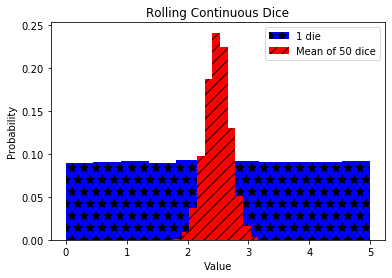

In [16]:

def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random() 
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color = color, label = legend,
               weights = pylab.array(len(means)*[1.0])/len(means),
               hatch = style)
    return getMeanAndStd(means)
 
mean, std = plotMeans(1, 100000, 11, '1 die', 'b', '*')
print('Mean of rolling 1 die =', mean, 'Std =', std)
mean, std = plotMeans(50, 100000, 11, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', mean, 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

#keine Gaussche Verteilung da nicht unendlich durchgeführt


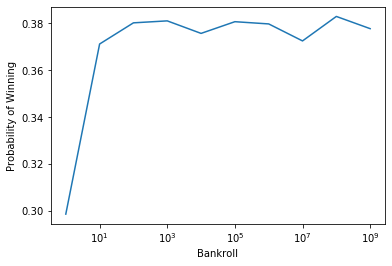

In [17]:

def leaveAhead(game, stake, bet, numTrials):
    numAhead = 0.0
    for t in range(numTrials):
        bankRoll = stake
        curBet = bet
        while bankRoll > 0 and bankRoll <= 2*stake:
            game.spin()
            outcome = game.betBlack(curBet)
            bankRoll += outcome
            if outcome < 0:
                curBet = min(2*curBet, bankRoll)
            #print curBet, bankRoll
        if bankRoll > stake:
            numAhead += 1
    return numAhead/numTrials

stake = 1
bet = 1
numTrials = 100000
successProb, stakes = [], []
for i in range(10):
    stakes.append(10**i)
    successProb.append(leaveAhead(AmRoulette(), 10**i, bet, numTrials))
pylab.plot(stakes, successProb)
pylab.xlabel('Bankroll')
pylab.ylabel('Probability of Winning')
pylab.semilogx()
pylab.show()

In [ ]:
import scipy.integratedef gaussian(x, mu, sigma)...

def checkEmpirical(numTrials):for t in range(numTrials):mu = random.randint(-10, 10)sigma = random.randint(1, 10)print('For mu =', mu, 'and sigma =', sigma)for numStd in (1, 1.96, 3):area = scipy.integrate.quad(gaussian,mu-numStd*sigma,mu+numStd*sigma,(mu, sigma))[0]print(' Fraction within', numStd,'std =', round(area, 4))